In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
 
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
 
 
model = VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

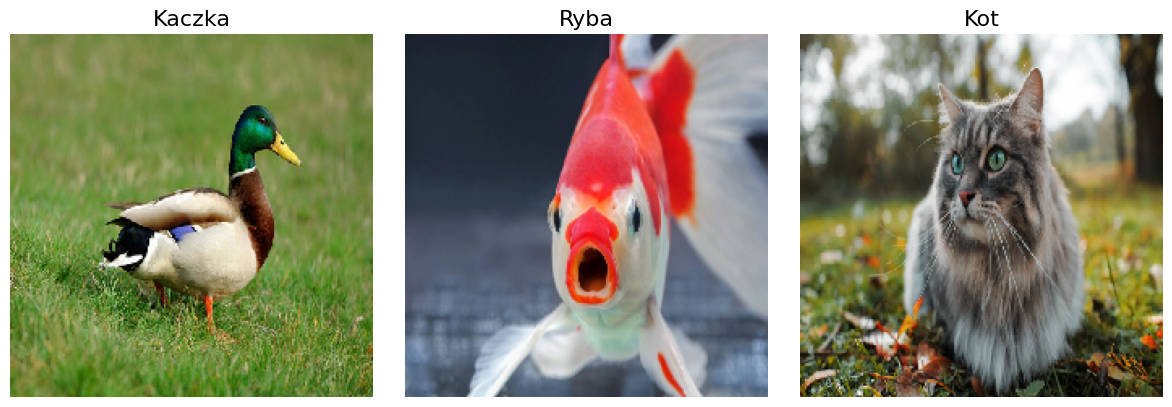

In [3]:
image_titles = ['Kaczka', 'Ryba', 'Kot']
 
img1 = load_img('Materialy/Lab06/Kaczkza.jpg', target_size=(224, 224))
img2 = load_img('Materialy/Lab06/Ryba.jpg', target_size=(224, 224))
img3 = load_img('Materialy/Lab06/Kot.jpg', target_size=(224, 224))
 
images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])
 
X = preprocess_input(images.copy())
 
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i, title in enumerate(image_titles):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(images[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [4]:
preds = model.predict(X)
best_class = preds.argmax(axis=-1)
 
print('Predicted:', decode_predictions(preds, top=3)[0]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label
print('Predicted:', decode_predictions(preds, top=3)[1]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label
print('Predicted:', decode_predictions(preds, top=3)[2]) #Decode prediction based on Imagenet dataset dictionary. Each umerical class is assigned to a real-life label

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted: [('n01847000', 'drake', 0.9998517), ('n01855672', 'goose', 0.00013730128), ('n01855032', 'red-breasted_merganser', 4.3972746e-06)]
Predicted: [('n01443537', 'goldfish', 0.98606175), ('n03535780', 'horizontal_bar', 0.0058400724), ('n03888605', 'parallel_bars', 0.0035553852)]
Predicted: [('n02123159', 'tiger_cat', 0.53421116), ('n02123045', 'tabby', 0.2594713), ('n02127052', 'lynx', 0.10563092)]


In [5]:
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tf_keras_vis.scorecam import Scorecam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

In [7]:
def visualise_heatmap(map):
  f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
  for i, title in enumerate(image_titles):
      heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
      ax[i].set_title(title, fontsize=16)
      ax[i].imshow(images[i])
      ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
      ax[i].axis('off')
  plt.tight_layout()
  plt.show()

GradCAM

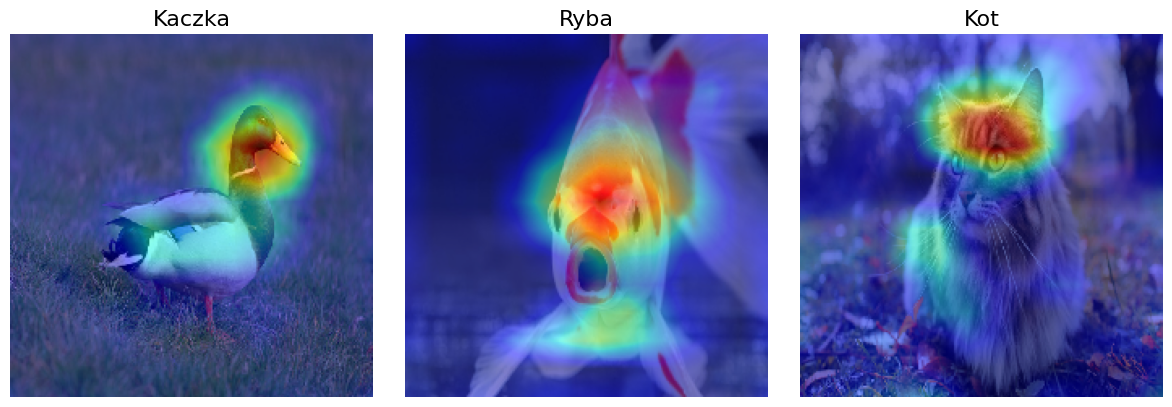

In [8]:
replace2linear = ReplaceToLinear()
score = CategoricalScore(list(best_class))
 
gradcam = Gradcam(model,
                  model_modifier=replace2linear,
                  clone=True)
 
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap(cam)

GradCAM++

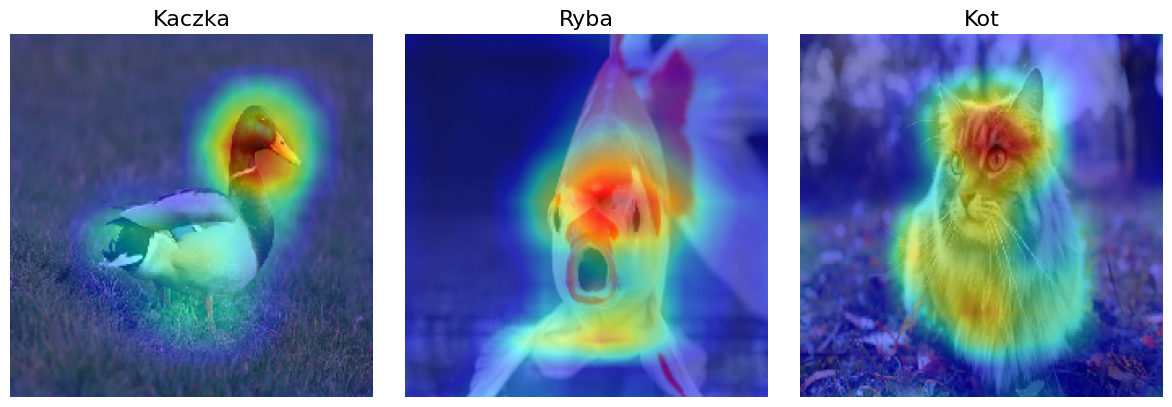

In [11]:
gradcam = GradcamPlusPlus(model,
                          model_modifier=replace2linear,
                          clone=True)
 
cam = gradcam(score,
              X,
              penultimate_layer=-1)
 
visualise_heatmap(cam)

ScoreCAM

48/48 ━━━━━━━━━━━━━━━━━━━━ 351s 7s/step


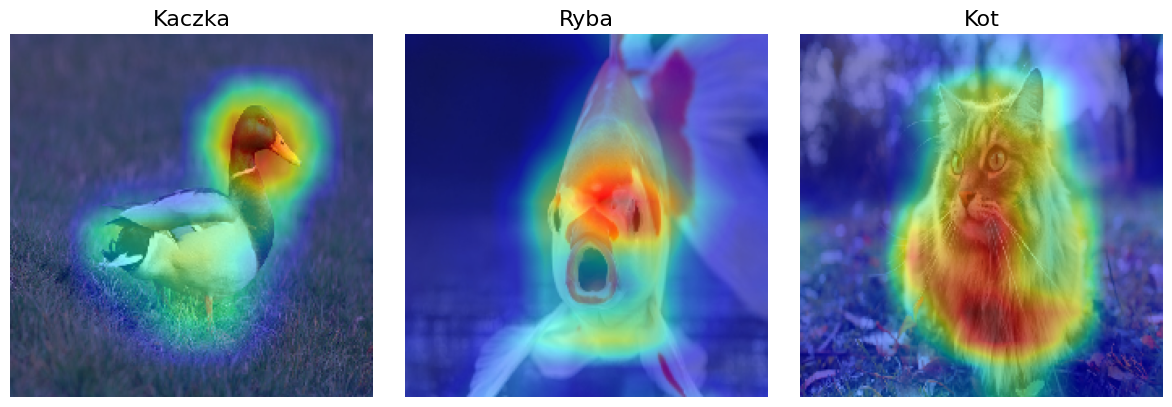

In [12]:
scorecam = Scorecam(model)
cam = scorecam(score, X, penultimate_layer=-1)
visualise_heatmap(cam)

Saliency

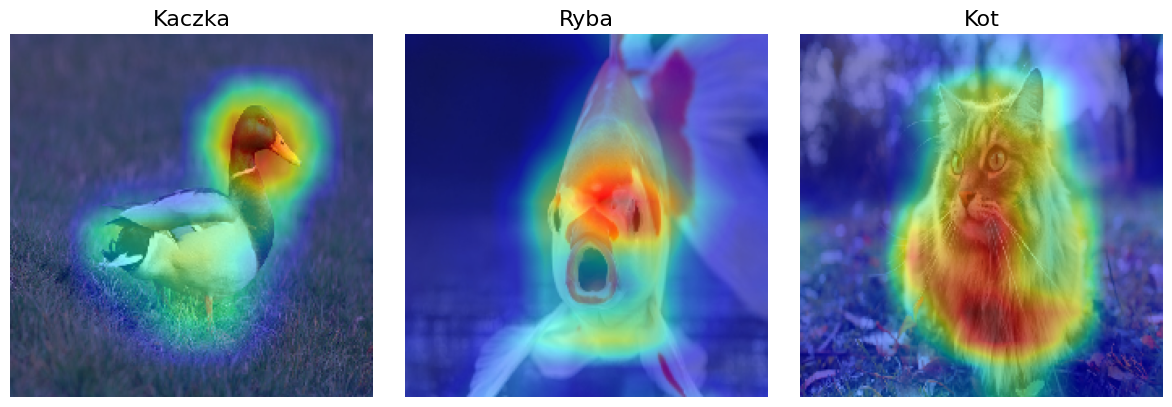

In [13]:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X)
visualise_heatmap(saliency_map)

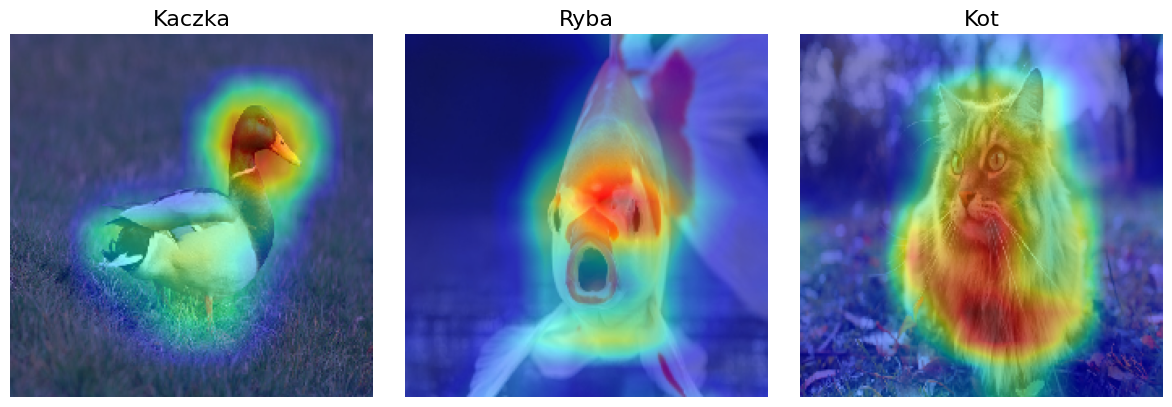

In [21]:
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.20)
visualise_heatmap(saliency_map)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 559ms/step
Predictions for Materialy/Lab06/cats.jpg
[('n02123045', 'tabby', 0.4696888), ('n02124075', 'Egyptian_cat', 0.3068631), ('n02123159', 'tiger_cat', 0.12954214)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 721ms/step


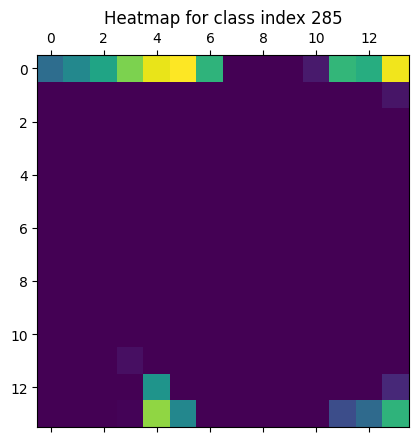

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
Predictions for Materialy/Lab06/cat_and_dog.jpg
[('n02090379', 'redbone', 0.09858139), ('n02087394', 'Rhodesian_ridgeback', 0.035198245), ('n04589890', 'window_screen', 0.0292611)]


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras import models

def test_multiple_objects(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    preds = model.predict(img_array)

    print('Predictions for', image_path)
    print(decode_predictions(preds, top=3)[0])

def visualize_heatmap(image_path, layer_name, class_index):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    activation_model = models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

    activations = activation_model.predict(img_array)

    heatmap = activations[0][:, :, class_index]

    plt.matshow(heatmap)
    plt.title('Heatmap for class index {}'.format(class_index))
    plt.show()

def test_contradictory_objects(image_path):
    test_multiple_objects(image_path)

test_multiple_objects('Materialy/Lab06/cats.jpg')

visualize_heatmap('Materialy/Lab06/Kot.jpg', 'block5_conv3', 285)

test_contradictory_objects('Materialy/Lab06/cat_and_dog.jpg')

Visualisation of intermediate activations

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 969ms/step


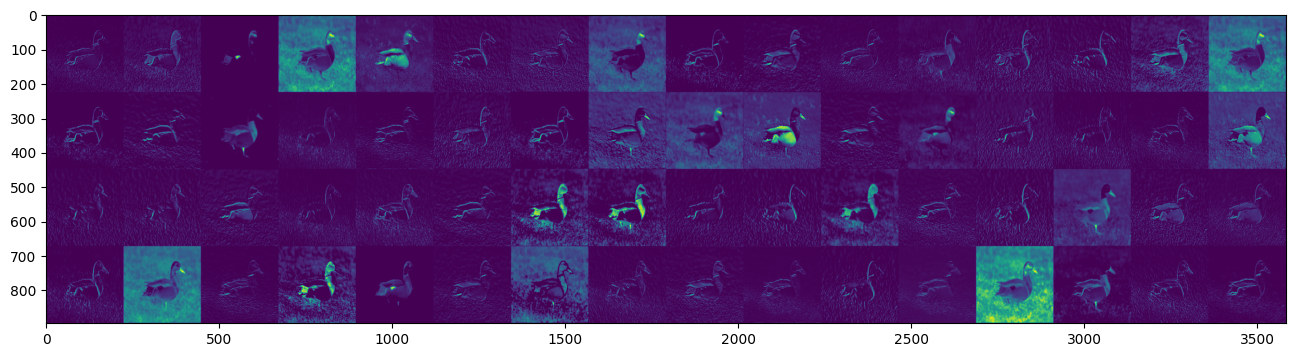

In [9]:
layer_outputs = [layer.output for layer in model.layers]
activation_model = models.Model(model.input, layer_outputs)
X_reshaped = X[0].reshape((1, 224, 224, 3))
activations = activation_model.predict(X_reshaped)
 
layer_names = []
for layer in model.layers[:-1]:
    layer_names.append(layer.name) 
 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    if layer_name == 'block1_conv2':
        number_of_feature_maps = layer_activation.shape[-1]
        feature_map_shape = layer_activation.shape[1]
        n_cols = number_of_feature_maps // images_per_row
        display_grid = np.zeros((feature_map_shape * n_cols, images_per_row * feature_map_shape))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,:, :, col * images_per_row + row]
                channel_image /= np.max(channel_image)
                display_grid[col * feature_map_shape : (col + 1) * feature_map_shape, row * feature_map_shape : (row + 1) * feature_map_shape] = channel_image
        scale = 1. / feature_map_shape
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.imshow(display_grid, aspect='auto', cmap='viridis')